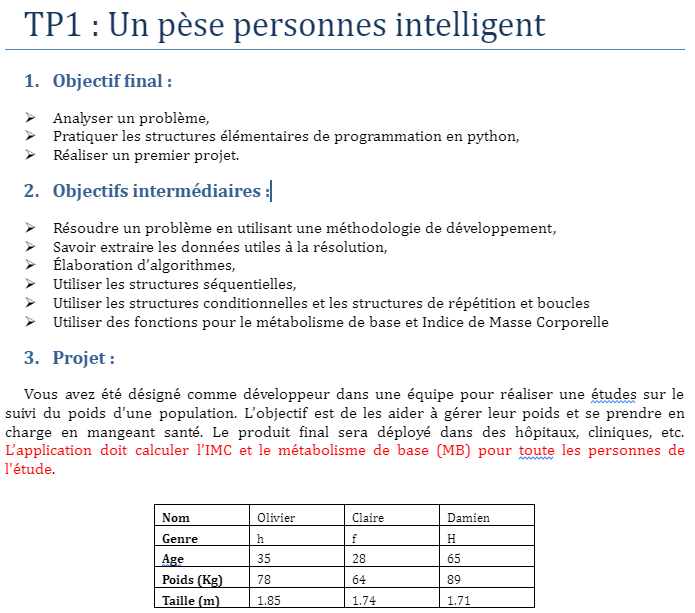

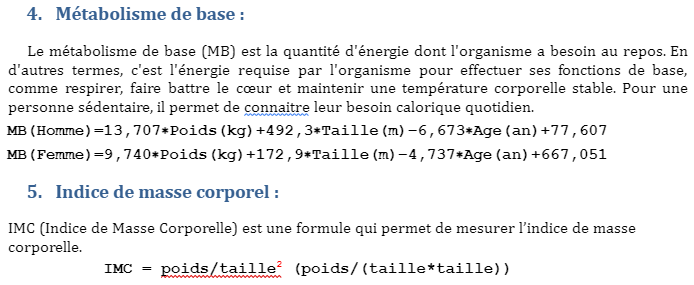

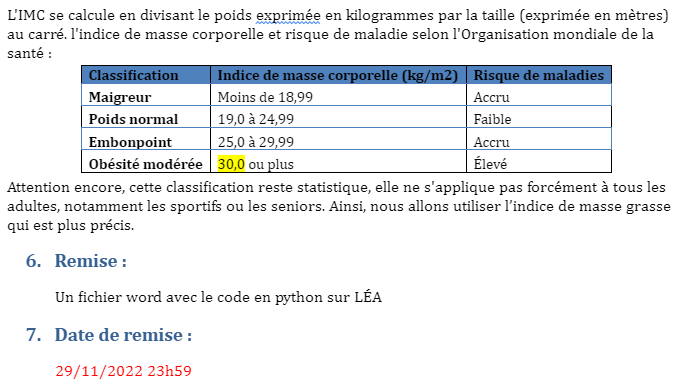

In [1]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import csv

def get_data():
  dataset = []

  with open('dataset.csv', newline='') as csvfile:
      reader = csv.DictReader(csvfile)
      for row in reader:
        dct = dict(nom = row['nom'], age = int(row['age']), poids_kg = float(row['poids_kg']), taille_m = float(row['taille_m']), genre = row['genre'])
        dataset.append(dct)
  return dataset

def get_metabilisme_base(dict_item):
  if dict_item.get('genre') == 'h':
    return (13.707 * dict_item.get('poids_kg') + 492.3 * dict_item.get('taille_m') - 6.673 * dict_item.get('taille_m') + 77.607)
  else:
    return (9.740 * dict_item.get('poids_kg') + 172.9 * dict_item.get('taille_m') - 4.737 * dict_item.get('taille_m') + 667.051)

def get_imc(dict_item):
    return (dict_item.get('poids_kg')/(dict_item.get('taille_m')**2))

def get_classification(imc):
  if imc <= 19:
      return dict(classificateur = "Maigreur", risque_maladies = "Accru")      
  elif imc >= 19 and imc < 25:
      return dict(classificateur = "Poids normal", risque_maladies = "Faible")
  elif imc >= 25 and imc < 30:
      return dict(classificateur = "Embonpoint", risque_maladies = "Accru")      
  elif imc >= 30:
      return dict(classificateur = "Obésité modérée", risque_maladies = "Élevé") 

dataset = get_data()

for it in dataset:
    mb = get_metabilisme_base(it)
    imc = get_imc(it)
    it.update({"mtabolisme_base": int(mb)})
    it.update({"imc": int(imc)})
    it.update(get_classification(int(imc)))
      

In [5]:
from tabulate import tabulate
print(tabulate(dataset, headers="keys"))

nom        age    poids_kg    taille_m  genre      mtabolisme_base    imc  classificateur    risque_maladies
-------  -----  ----------  ----------  -------  -----------------  -----  ----------------  -----------------
Olivier     35          78        1.85  h                     2045     22  Poids normal      Faible
Claire      28          64        1.74  f                     1583     21  Poids normal      Faible
Damien      65          89        1.71  h                     2127     30  Obésité modérée   Élevé
